1. All the required dataset are attached with the file.
    (ufo.csv dataset for Question 1,
    u.user dataset for Question 2,
    Movie.csv dataset for Question 3)



In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

## Question1

In [2]:
# read ufo.csv into a DataFrame called 'ufo'
ufo = pd.read_csv('ufo.csv')

# print the head and the tail
print(ufo.head())
print(ufo.tail())

# examine the default index, data types, and shape of ufo dataframe
print(ufo.index)
print(ufo.shape)
print(ufo.dtypes)


                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
                  City Colors Reported Shape Reported State             Time
33856  West Des Moines             NaN          LIGHT    IA  9/11/2005 21:03
33857           Clovis             NaN          LIGHT    NM  9/11/2005 22:30
33858         Hesperia             NaN       TRIANGLE    CA  9/11/2005 22:30
33859        Dade City             NaN          LIGHT    FL  9/11/2005 23:00
33860         Henniker             NaN            NaN    NH                9
RangeIndex(start=0, stop=33861, step=1)
(33861, 5)
City               

In [3]:
# count the number of missing values in each column
print(ufo.isnull().sum(axis = 0))  

# count total number of null vlaues in the dataframe
print(ufo.isnull())

# print those rows which has null values
print(ufo.isnull().sum(axis = 1))

City                  35
Colors Reported    28477
Shape Reported      4191
State                  0
Time                   0
dtype: int64
        City  Colors Reported  Shape Reported  State   Time
0      False             True           False  False  False
1      False             True           False  False  False
2      False             True           False  False  False
3      False             True           False  False  False
4      False             True           False  False  False
...      ...              ...             ...    ...    ...
33856  False             True           False  False  False
33857  False             True           False  False  False
33858  False             True           False  False  False
33859  False             True           False  False  False
33860  False             True            True  False  False

[33861 rows x 5 columns]
0        1
1        1
2        1
3        1
4        1
        ..
33856    1
33857    1
33858    1
33859    1
33860 

In [4]:
# fill null values, 
#if any column is numerical has null value than fill this column with mean of that column
alpha = ufo.fillna(ufo.mean())
#print(ufo)
#if any column is categorical than fill this column with most frequent value of that column
beta = ufo.fillna(ufo.mode().iloc[0])
print(beta)

                       City Colors Reported Shape Reported State  \
0                    Ithaca             RED       TRIANGLE    NY   
1               Willingboro             RED          OTHER    NJ   
2                   Holyoke             RED           OVAL    CO   
3                   Abilene             RED           DISK    KS   
4      New York Worlds Fair             RED          LIGHT    NY   
...                     ...             ...            ...   ...   
33856       West Des Moines             RED          LIGHT    IA   
33857                Clovis             RED          LIGHT    NM   
33858              Hesperia             RED       TRIANGLE    CA   
33859             Dade City             RED          LIGHT    FL   
33860              Henniker             RED          LIGHT    NH   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
33856  9

In [5]:
# calculate the most frequent value for each of the columns (in a single command)
print(ufo['City']. value_counts(). idxmax())

# what are the four most frequent colors reported?
print(ufo['Colors Reported'].value_counts().head(4))

# for reports in VA, what's the most frequent city?
print(ufo[ufo.State=='VA'].City.value_counts()[:1])

# show only the UFO reports from Arlington, VA
print(ufo[(ufo.City=='Arlington') & (ufo.State=='VA')])

# show only the UFO reports in which the City is missing
print(ufo[ufo.City.isnull()])

# how many rows remain if you drop all rows with any missing values?
print(ufo.dropna().shape[0])

# replace any spaces in the column names with an underscore
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)

# create a new column called 'Location' that includes both City and State
# For example, the 'Location' for the first row would be 'Ithaca, NY'
ufo['Location'] = ufo.City + ', ' + ufo.State

# map existing values to a different set of values
# like in column 'is_male', convert F value to 0 and M to 1 with pandas
users['is_male'] = users.gender.map({'F':0, 'M':1})

# writing generic code to replace spaces with underscores
# In other words, your code should not reference the specific column names
ufo.columns = [col.replace(' ', '_') for col in ufo.columns]
ufo.columns = ufo.columns.str.replace(' ', '_')
# convert datatype of column 'time'  to the datetime format
ufo['Time'] = pd.to_datetime(ufo.Time, errors = "ignore")

Seattle
RED       1555
ORANGE     999
GREEN      887
BLUE       825
Name: Colors Reported, dtype: int64
Virginia Beach    45
Name: City, dtype: int64
            City Colors Reported Shape Reported State              Time
202    Arlington           GREEN           OVAL    VA   7/13/1952 21:00
6300   Arlington             NaN        CHEVRON    VA    5/5/1990 21:40
10278  Arlington             NaN           DISK    VA   5/27/1997 15:30
14527  Arlington             NaN          OTHER    VA   9/10/1999 21:41
17984  Arlington             RED           DISK    VA  11/19/2000 22:00
21201  Arlington           GREEN       FIREBALL    VA    1/7/2002 17:45
22633  Arlington             NaN          LIGHT    VA    7/26/2002 1:15
22780  Arlington             NaN          LIGHT    VA    8/7/2002 21:00
25066  Arlington             NaN          CIGAR    VA    6/1/2003 22:34
27398  Arlington             NaN        VARIOUS    VA   12/13/2003 2:00
30608  Arlington             NaN         CIRCLE    VA   10

NameError: name 'users' is not defined

# Question 2

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

#importing file
users = pd.read_table('u.user', sep='|', index_col='user_id')

Describe and show the dataframe

In [13]:
# describe information of all columns
print(users.describe)
# describe information of all numeric columns only
print(users.describe()) 
# describe information of all object columns only
print(users.describe(include=['object'])) 
# show first 10 rows of users dataframe
print(users.head(10))

<bound method NDFrame.describe of          age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
...      ...    ...            ...      ...
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841

[943 rows x 4 columns]>
              age
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000
       gender occupation zip_code
count     943        943      943
unique      2         21      795
top         M    student    55414
freq      670        196        9
         age gender     occupation zi

detecting duplicate rows

In [14]:
# check wheather a row is identical to a previous row
print(users.duplicated())
# count all duplicate rows in the dataframe
print(users.duplicated().sum()) 
# show only duplicate rows in the dataframe
print(users[users.duplicated()])
# drop all duplicate rows in the dataframe
print(users.drop_duplicates()) 
# check a single specific column for duplicates occur or not
print(users.age.duplicated())
# check specify more than one column for finding duplicates
print(users.duplicated(['age', 'gender', 'zip_code']).sum()) 

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool
7
         age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301
         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
...      ...    ...            ...      ...
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M   

In [15]:
# display the 3 most frequent occupations in 'users'
print(users.occupation.value_counts().head(3))
# change the data type of a column name age from int to float
users['age'] = users.age.astype('float')
print(users['age'].dtypes)
# for each occupation, calculate the minimum and maximum ages
print(users.groupby('occupation').age.agg(['min', 'max']))

student     196
other       105
educator     95
Name: occupation, dtype: int64
float64
                min   max
occupation               
administrator  21.0  70.0
artist         19.0  48.0
doctor         28.0  64.0
educator       23.0  63.0
engineer       22.0  70.0
entertainment  15.0  50.0
executive      22.0  69.0
healthcare     22.0  62.0
homemaker      20.0  50.0
lawyer         21.0  53.0
librarian      23.0  69.0
marketing      24.0  55.0
none           11.0  55.0
other          13.0  64.0
programmer     20.0  63.0
retired        51.0  73.0
salesman       18.0  66.0
scientist      23.0  55.0
student         7.0  42.0
technician     21.0  55.0
writer         18.0  60.0


student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


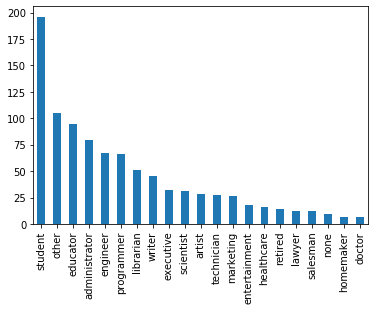

In [16]:
# for each occupation in 'users', count the number of occurrences
print(users.occupation.value_counts())
# plot barchar of upper out w.r.t each occupation 
print(users['occupation'].value_counts().plot(kind='bar'))

In [17]:
# for each occupation, calculate the mean age
print(users.groupby('occupation').age.mean())
# plot pie chart of the upper output
print(mean.plot(kind='pie'))

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


NameError: name 'mean' is not defined

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

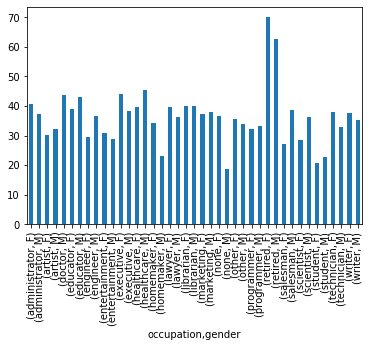

In [40]:
# for each combination of occupation and gender, calculate the mean age
occupation_cal = users.groupby(['occupation', 'gender']).age.mean()
print(occupation_cal)
# plot barchar of upper out w.r.t each occupation and gender 
print(occupation_cal.plot(kind='bar'))

In [41]:
# sort 'users' by 'occupation' and then by 'age' (in a single command)
users.sort_values(['occupation','age'])

,age,gender,occupation,zip_code
user_id,,,,
118,21.0,M,administrator,90210
180,22.0,F,administrator,60202
282,22.0,M,administrator,20057
317,22.0,M,administrator,13210
439,23.0,F,administrator,20817
...,...,...,...,...
548,51.0,M,writer,95468
370,52.0,M,writer,08534
392,52.0,M,writer,59801


# Question 3

In [42]:
# read movie.csv into a DataFrame called 'movie'
movie = pd.read_csv('Movie.csv')

# describe the dataframe
#print(movie.head())
print(movie.describe)

#rename the column Runtime (Minutes) with Runtime_Minutes, and Revenue (Millions) with Revenue_Millions 
movie.rename(columns={'Runtime (Minutes)':'Runtime_Minutes', 'Revenue (Millions)':'Revenue_Millions'})

<bound method NDFrame.describe of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [43]:
# show if any column has null value
print(movie.isnull()) 
# count total number of null vlaues in the dataframe
print(movie.isnull().sum())
# print those rows which has null values
print(movie.isnull().sum(axis = 1))

      Rank  Title  Genre  Description  Director  Actors   Year  \
0    False  False  False        False     False   False  False   
1    False  False  False        False     False   False  False   
2    False  False  False        False     False   False  False   
3    False  False  False        False     False   False  False   
4    False  False  False        False     False   False  False   
..     ...    ...    ...          ...       ...     ...    ...   
995  False  False  False        False     False   False  False   
996  False  False  False        False     False   False  False   
997  False  False  False        False     False   False  False   
998  False  False  False        False     False   False  False   
999  False  False  False        False     False   False  False   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
0                False   False  False               False      False  
1                False   False  False               False      Fa

In [44]:
# fill null values, 
#if column is numerical than fill with means (if there is no numerical missing value in 
#data frame then don't code in this)

movie.fillna(movie.mean(), inplace=True)

#if column is categorical than fill with most frequent value (if there is no categorical missing value in 
#data frame then don't code in this)



<ipython-input-45-5c71b05be8ab>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


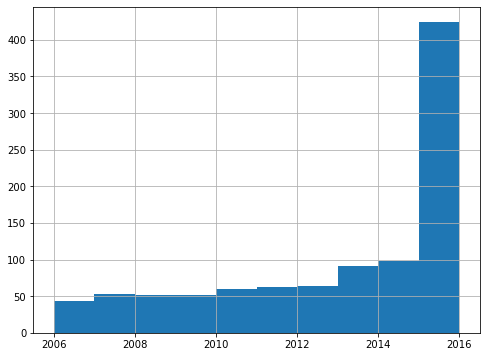

In [45]:
# plot histogram of the column name year in movie dataframe, which shows how many movies release in a year.

fig, ax = plt.subplots(figsize =(8, 6))
movie['Year'].hist()
fig.show()


In [46]:
# print the movie detail with title 'Grumpier Old Men'.

movie[movie.Title=='Grumpier Old Men']


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [47]:
# show those movies which are released after 1995-01-01

print(movie[movie.Year>1995])


     Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley 

In [48]:
# sort the movie DataFrame in decending order based on release_date

print(movie.sort_values('Year', ascending=False))

     Rank                               Title                    Genre  \
999  1000                          Nine Lives    Comedy,Family,Fantasy   
161   162                           Free Fire      Action,Comedy,Crime   
647   648                            Tall Men  Fantasy,Horror,Thriller   
234   235          The Huntsman: Winter's War   Action,Adventure,Drama   
653   654  Popstar: Never Stop Never Stopping             Comedy,Music   
..    ...                                 ...                      ...   
715   716                          Happy Feet  Animation,Comedy,Family   
727   728                     The Illusionist    Drama,Mystery,Romance   
965   966                       Inland Empire   Drama,Mystery,Thriller   
559   560                           Idiocracy  Adventure,Comedy,Sci-Fi   
230   231                     Pan's Labyrinth        Drama,Fantasy,War   

                                           Description               Director  \
999  A stuffy businessman find

In [50]:
# for each year, display the total number of movie with specific gerne for example Action=1000,adventure=400

movie_spe = (movie.groupby('Genre')['Genre'].count()
print(movie_spe)



# plot histogram the upper calculated total count
                  
fig, ax = plt.subplots(figsize =(10, 7))
fig = movie_spe.hist()
plt.show()




SyntaxError: invalid syntax (<ipython-input-50-67015d651f05>, line 4)

![barchart.png](attachment:barchart.png)

In [30]:
# filter the movies with specific gerne
# like show only those movies which are selected Action gerne

print(movie[movie['Genre']=='Action'])

     Rank                 Title   Genre  \
123   124  Boyka: Undisputed IV  Action   
580   581  Kickboxer: Vengeance  Action   

                                           Description         Director  \
123  In the fourth installment of the fighting fran...  Todor Chapkanov   
580         A kick boxer is out to avenge his brother.   John Stockwell   

                                                Actors  Year  \
123  Scott Adkins, Teodora Duhovnikova, Alon Aboutb...  2016   
580  Dave Bautista, Alain Moussi, Gina Carano, Jean...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
123                 86     7.4  10428           82.956376  58.985043  
580                 90     4.9   6809          131.560000  37.000000  


---------------------------------James Gunn---------------------------------------
     Rank                    Title                    Genre  \
0       1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   
908   909                  Slither     Comedy,Horror,Sci-Fi   
937   938                    Super             Comedy,Drama   

                                           Description    Director  \
0    A group of intergalactic criminals are forced ...  James Gunn   
908  A small town is taken over by an alien plague,...  James Gunn   
937  After his wife falls under the influence of a ...  James Gunn   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
908  Nathan Fillion, Elizabeth Banks, Michael Rooke...  2006   
937   Rainn Wilson, Ellen Page, Liv Tyler, Kevin Bacon  2010   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0                  121     8.1  757074              33

     Rank          Title                    Genre  \
47     48         Fallen  Adventure,Drama,Fantasy   
887   888  The Lucky One            Drama,Romance   

                                           Description     Director  \
47   A young girl finds herself in a reform school ...  Scott Hicks   
887  A Marine travels to Louisiana after serving th...  Scott Hicks   

                                                Actors  Year  \
47   Hermione Corfield, Addison Timlin, Joely Richa...  2016   
887  Zac Efron, Taylor Schilling, Blythe Danner, Ri...  2012   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
47                  91     5.6   5103           82.956376  58.985043  
887                101     6.5  82874           60.440000  39.000000  
---------------------------------Justin Lin---------------------------------------
     Rank                                  Title                    Genre  \
48     49                       Star Trek Beyond  Action,Adv

     Rank                               Title                    Genre  \
104   105             The Man from U.N.C.L.E.  Action,Adventure,Comedy   
281   282                     Sherlock Holmes   Action,Adventure,Crime   
322   323                          RocknRolla    Action,Crime,Thriller   
465   466  Sherlock Holmes: A Game of Shadows   Action,Adventure,Crime   

                                           Description     Director  \
104  In the early 1960s, CIA agent Napoleon Solo an...  Guy Ritchie   
281  Detective Sherlock Holmes and his stalwart par...  Guy Ritchie   
322  In London, a real-estate scam puts millions of...  Guy Ritchie   
465  Sherlock Holmes and his sidekick Dr. Watson jo...  Guy Ritchie   

                                                Actors  Year  \
104  Henry Cavill, Armie Hammer, Alicia Vikander, E...  2015   
281  Robert Downey Jr., Jude Law, Rachel McAdams, M...  2009   
322  Gerard Butler, Tom Wilkinson, Idris Elba, Than...  2008   
465  Robert Downe

173                126     8.0  390531               25.56       90.0  
---------------------------------Chris Buck---------------------------------------
     Rank   Title                       Genre  \
174   175  Frozen  Animation,Adventure,Comedy   

                                           Description    Director  \
174  When the newly crowned Queen Elsa accidentally...  Chris Buck   

                                                Actors  Year  \
174  Kristen Bell, Idina Menzel, Jonathan Groff, Jo...  2013   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
174                102     7.5  451894              400.74       74.0  
---------------------------------Brad Bird---------------------------------------
     Rank                                 Title                      Genre  \
175   176                          Tomorrowland    Action,Adventure,Family   
433   434  Mission: Impossible - Ghost Protocol  Action,Adventure,Thriller   
489   490       

     Rank               Title         Genre  \
247   248  20th Century Women  Comedy,Drama   

                                           Description    Director  \
247  The story of a teenage boy, his mother, and tw...  Mike Mills   

                                                Actors  Year  \
247  Annette Bening, Elle Fanning, Greta Gerwig, Bi...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
247                119     7.4  14708                5.66       83.0  
---------------------------------Olivier Nakache---------------------------------------
     Rank             Title                   Genre  \
249   250  The Intouchables  Biography,Comedy,Drama   

                                           Description         Director  \
249  After he becomes a quadriplegic from a paragli...  Olivier Nakache   

                                                Actors  Year  \
249  François Cluzet, Omar Sy, Anne Le Ny, Audrey F...  2011   

     Runtime (

     Rank            Title          Genre  \
317   318  The Stakelander  Action,Horror   

                                           Description  Director  \
317  When his home of New Eden is destroyed by a re...  Dan Berk   

                                                Actors  Year  \
317  Connor Paolo, Nick Damici, Laura Abramsen, A.C...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
317                 81     5.3   1263           82.956376  58.985043  
---------------------------------Anne Fletcher---------------------------------------
     Rank         Title                 Genre  \
320   321       Step Up     Crime,Drama,Music   
456   457  The Proposal  Comedy,Drama,Romance   

                                           Description       Director  \
320  Tyler Gage receives the opportunity of a lifet...  Anne Fletcher   
456  A pushy boss forces her young assistant to mar...  Anne Fletcher   

                                               

393                 98     5.0    102           82.956376       43.0  
---------------------------------Dennis Dugan---------------------------------------
     Rank                          Title           Genre  \
394   395                    Grown Ups 2          Comedy   
458   459                Just Go with It  Comedy,Romance   
722   723                      Grown Ups          Comedy   
837   838  You Don't Mess with the Zohan   Action,Comedy   

                                           Description      Director  \
394  After moving his family back to his hometown t...  Dennis Dugan   
458  On a weekend trip to Hawaii, a plastic surgeon...  Dennis Dugan   
722  After their high school basketball coach passe...  Dennis Dugan   
837  An Israeli Special Forces Soldier fakes his de...  Dennis Dugan   

                                                Actors  Year  \
394  Adam Sandler, Kevin James, Chris Rock, David S...  2013   
458  Adam Sandler, Jennifer Aniston, Brooklyn Decke...

     Rank      Title                 Genre  \
466   467       Salt  Action,Crime,Mystery   
481   482  The Giver  Drama,Romance,Sci-Fi   

                                           Description       Director  \
466  A CIA agent goes on the run after a defector a...  Phillip Noyce   
481  In a seemingly perfect community, without war,...  Phillip Noyce   

                                                Actors  Year  \
466  Angelina Jolie, Liev Schreiber, Chiwetel Ejiof...  2010   
481  Brenton Thwaites, Jeff Bridges, Meryl Streep, ...  2014   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
466                100     6.4  255813              118.31       65.0  
481                 97     6.5   93799               45.09       47.0  
---------------------------------Neill Blomkamp---------------------------------------
     Rank       Title                   Genre  \
468   469  District 9  Action,Sci-Fi,Thriller   
517   518     Chappie      Action,Crime,Drama  

     Rank    Title                   Genre  \
554   555  Colonia  Drama,Romance,Thriller   

                                           Description              Director  \
554  A young woman's desperate search for her abduc...  Florian Gallenberger   

                                                Actors  Year  \
554  Emma Watson, Daniel Brühl, Michael Nyqvist,Ric...  2015   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
554                106     7.1  30074           82.956376       33.0  
---------------------------------Rob Cohen---------------------------------------
     Rank                                  Title                     Genre  \
555   556                      The Boy Next Door          Mystery,Thriller   
739   740  The Mummy: Tomb of the Dragon Emperor  Action,Adventure,Fantasy   

                                           Description   Director  \
555  A woman, separated from her unfaithful husband...  Rob Cohen   
739  In the Far East

---------------------------------Michael Goi---------------------------------------
     Rank             Title                  Genre  \
633   634  Megan Is Missing  Drama,Horror,Thriller   

                                           Description     Director  \
633  Two teenage girls encounter an Internet child ...  Michael Goi   

                                                Actors  Year  \
633  Amber Perkins, Rachel Quinn, Dean Waite, Jael ...  2011   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
633                 85     4.9   6683           82.956376       94.0  
---------------------------------Levan Gabriadze---------------------------------------
     Rank       Title                 Genre  \
638   639  Unfriended  Drama,Horror,Mystery   

                                           Description         Director  \
638  A group of online chat room friends find thems...  Levan Gabriadze   

                                                Actors  Yea

     Rank         Title                    Genre  \
754   755  Lída Baarová  Biography,Drama,History   

                                           Description    Director  \
754  A film about the black-and-white era actress L...  Filip Renc   

                                                Actors  Year  \
754  Tatiana Pauhofová, Karl Markovics, Gedeon Burk...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
754                106     5.0    353           82.956376       64.0  
---------------------------------Ed Gass-Donnelly---------------------------------------
     Rank     Title           Genre  \
756   757  Lavender  Drama,Thriller   

                                           Description          Director  \
756  After losing her memory, a woman begins to see...  Ed Gass-Donnelly   

                                                Actors  Year  \
756  Abbie Cornish, Dermot Mulroney, Justin Long,Di...  2016   

     Runtime (Minutes)  Rating  V

     Rank          Title                       Genre  \
854   855  Kung Fu Panda  Animation,Action,Adventure   

                                           Description      Director  \
854  The Dragon Warrior has to clash against the sa...  Mark Osborne   

                                                Actors  Year  \
854  Jack Black, Ian McShane,Angelina Jolie, Dustin...  2008   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
854                 92     7.6  329788               215.4       73.0  
---------------------------------Malcolm D. Lee---------------------------------------
     Rank                     Title         Genre  \
855   856  Barbershop: The Next Cut  Comedy,Drama   

                                           Description        Director  \
855  As their surrounding community has taken a tur...  Malcolm D. Lee   

                                           Actors  Year  Runtime (Minutes)  \
855  Ice Cube, Regina Hall, Anthony Anderson, Ev

     Rank  Title      Genre  \
949   950  Kicks  Adventure   

                                           Description        Director  \
949  Brandon is a 15 year old whose dream is a pair...  Justin Tipping   

                                                Actors  Year  \
949  Jahking Guillory, Christopher Jordan Wallace,C...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
949                 80     6.1   2417                0.15       69.0  
---------------------------------Alfonso Gomez-Rejon---------------------------------------
     Rank                           Title         Genre  \
950   951  Me and Earl and the Dying Girl  Comedy,Drama   

                                           Description             Director  \
950  High schooler Greg, who spends most of his tim...  Alfonso Gomez-Rejon   

                                                Actors  Year  \
950  Thomas Mann, RJ Cyler, Olivia Cooke, Nick Offe...  2015   

     Runtime (Minu

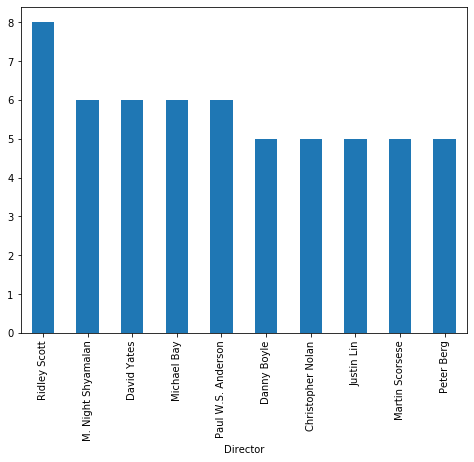

In [31]:
# for each Director, display all the movies with detail.

make_dir = movie['Director'].unique().tolist()
for director in make_dir:
    df = movie[movie['Director'] == director]
    print('---------------------------------'+director+'---------------------------------------')
    print(df.head())

# count the movies and plot barchart top 10 director's movies.

top_make = movie.groupby('Director')['Director'].count().sort_values(ascending=False).head(10)
print(top_make)

fig, ax = plt.subplots(figsize =(8, 6))
top_make.plot.bar()
plt.show()



---------------------------------Emory Cohen---------------------------------------
     Rank            Title                 Genre  \
307   308  Vincent N Roxxy  Crime,Drama,Thriller   
441   442         Brooklyn         Drama,Romance   
933   934           Detour              Thriller   

                                           Description              Director  \
307  A small town loner and a rebellious punk rocke...  Gary Michael Schultz   
441  An Irish immigrant lands in 1950s Brooklyn, wh...          John Crowley   
933  A young law student blindly enters into a pact...     Christopher Smith   

                                                Actors  Year  \
307  Emile Hirsch, Zoë Kravitz, Zoey Deutch,Emory C...  2016   
441  Saoirse Ronan, Emory Cohen, Domhnall Gleeson,J...  2015   
933  Tye Sheridan, Emory Cohen, Bel Powley,Stephen ...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
307                110     5.5    403           82.956376 

823                119     7.0   5855                 0.3       72.0  
--------------------------------- Catherine Bégin---------------------------------------
     Rank    Title   Genre                                        Description  \
988   989  Martyrs  Horror  A young woman's quest for revenge against the ...   

           Director                                             Actors  Year  \
988  Pascal Laugier  Morjana Alaoui, Mylène Jampanoï, Catherine Bég...  2008   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
988                 99     7.1  63785           82.956376       89.0  
---------------------------------Kevin Chamberlin---------------------------------------
     Rank               Title               Genre  \
917   918  The Girl Next Door  Crime,Drama,Horror   

                                           Description        Director  \
917  Based on the Jack Ketchum novel of the same na...  Gregory Wilson   

                             

     Rank      Title   Genre  \
722   723  Grown Ups  Comedy   

                                           Description      Director  \
722  After their high school basketball coach passe...  Dennis Dugan   

                                                Actors  Year  \
722  Adam Sandler, Salma Hayek, Kevin James, Chris ...  2010   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
722                102     6.0  190385               162.0       30.0  
--------------------------------- Mel Raido---------------------------------------
     Rank                     Title                  Genre  \
237   238  The Disappointments Room  Drama,Horror,Thriller   

                                           Description     Director  \
237  A mother and her young son release unimaginabl...  D.J. Caruso   

                                                Actors  Year  \
237  Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...  2016   

     Runtime (Minutes)  Rating  Votes

     Rank       Title               Genre  \
295   296  The Choice       Drama,Romance   
410   411       Taken     Action,Thriller   
624   625     Taken 3     Action,Thriller   
704   705      Faster  Action,Crime,Drama   

                                           Description            Director  \
295  Travis and Gabby first meet as neighbors in a ...           Ross Katz   
410  A retired CIA agent travels across Europe and ...        Pierre Morel   
624  Ex-government operative Bryan Mills is accused...     Olivier Megaton   
704  An ex-con gets on a series of apparently unrel...  George Tillman Jr.   

                                                Actors  Year  \
295  Benjamin Walker, Teresa Palmer, Alexandra Dadd...  2016   
410  Liam Neeson, Maggie Grace, Famke Janssen, Lela...  2008   
624  Liam Neeson, Forest Whitaker, Maggie Grace,Fam...  2014   
704  Dwayne Johnson, Billy Bob Thornton, Maggie Gra...  2010   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Me

     Rank      Title                       Genre  \
274   275  Ballerina  Animation,Adventure,Comedy   

                                           Description     Director  \
274  An orphan girl dreams of becoming a ballerina ...  Eric Summer   

                                                Actors  Year  \
274  Elle Fanning, Dane DeHaan, Carly Rae Jepsen, M...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
274                 89     6.8   4729           82.956376  58.985043  
--------------------------------- Sandra Bullock---------------------------------------
     Rank           Title                  Genre  \
310   311  The Blind Side  Biography,Drama,Sport   

                                           Description          Director  \
310  The story of Michael Oher, a homeless and trau...  John Lee Hancock   

                                                Actors  Year  \
310  Quinton Aaron, Sandra Bullock, Tim McGraw,Jae ...  2009   

     R

     Rank                Title           Genre  \
887   888        The Lucky One   Drama,Romance   
943   944  What's Your Number?  Comedy,Romance   

                                           Description     Director  \
887  A Marine travels to Louisiana after serving th...  Scott Hicks   
943  A woman looks back at the past nineteen men sh...   Mark Mylod   

                                                Actors  Year  \
887  Zac Efron, Taylor Schilling, Blythe Danner, Ri...  2012   
943  Anna Faris, Chris Evans, Ari Graynor, Blythe D...  2011   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
887                101     6.5  82874               60.44       39.0  
943                106     6.1  62095               13.99       35.0  
---------------------------------Craig T. Nelson---------------------------------------
     Rank         Title                 Genre  \
456   457  The Proposal  Comedy,Drama,Romance   

                                          

     Rank              Title                  Genre  \
245   246     Les Misérables  Drama,Musical,Romance   
470   471  American Gangster  Biography,Crime,Drama   
737   738       Body of Lies   Action,Drama,Romance   

                                           Description      Director  \
245  In 19th-century France, Jean Valjean, who for ...    Tom Hooper   
470  In 1970s America, a detective works to bring d...  Ridley Scott   
737  A CIA agent on the ground in Jordan hunts down...  Ridley Scott   

                                                Actors  Year  \
245  Hugh Jackman, Russell Crowe, Anne Hathaway,Ama...  2012   
470  Denzel Washington, Russell Crowe, Chiwetel Eji...  2007   
737  Leonardo DiCaprio, Russell Crowe, Mark Strong,...  2008   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
245                158     7.6  257426              148.78       63.0  
470                157     7.8  337835              130.13       76.0  
737              

    Rank          Title                Genre  \
95    96  The Nice Guys  Action,Comedy,Crime   

                                          Description     Director  \
95  In 1970s Los Angeles, a mismatched pair of pri...  Shane Black   

                                               Actors  Year  \
95  Russell Crowe, Ryan Gosling, Angourie Rice, Ma...  2016   

    Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
95                116     7.4  175067               36.25       70.0  
--------------------------------- Emma Thompson---------------------------------------
     Rank                Title                       Genre  \
589   590                Brave  Animation,Adventure,Comedy   
610   611  Beautiful Creatures       Drama,Fantasy,Romance   

                                           Description             Director  \
589  Determined to make her own path in life, Princ...         Mark Andrews   
610  Ethan longs to escape his small Southern town....  Richa

     Rank    Title                 Genre  \
153   154  Sicario    Action,Crime,Drama   
506   507  Savages  Crime,Drama,Thriller   

                                           Description          Director  \
153  An idealistic FBI agent is enlisted by a gover...  Denis Villeneuve   
506  Pot growers Ben and Chon face off against the ...      Oliver Stone   

                                                Actors  Year  \
153  Emily Blunt, Josh Brolin, Benicio Del Toro, Jo...  2015   
506  Aaron Taylor-Johnson, Taylor Kitsch, Blake Liv...  2012   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
153                121     7.6  243230               46.88       82.0  
506                131     6.5  107960               47.31       59.0  
--------------------------------- Dwayne Johnson---------------------------------------
     Rank          Title                       Genre  \
13     14          Moana  Animation,Adventure,Comedy   
84     85  Furious Seven     

     Rank          Title          Genre  \
887   888  The Lucky One  Drama,Romance   

                                           Description     Director  \
887  A Marine travels to Louisiana after serving th...  Scott Hicks   

                                                Actors  Year  \
887  Zac Efron, Taylor Schilling, Blythe Danner, Ri...  2012   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
887                101     6.5  82874               60.44       39.0  
--------------------------------- Adam G. Sevani---------------------------------------
     Rank                   Title                Genre  \
997   998  Step Up 2: The Streets  Drama,Music,Romance   

                                           Description    Director  \
997  Romantic sparks occur between two dance studen...  Jon M. Chu   

                                                Actors  Year  \
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   

     Runtime (Minutes)  

     Rank                                        Title  \
45     46  Pirates of the Caribbean: On Stranger Tides   
75     76     Pirates of the Caribbean: At World's End   
78     79   Pirates of the Caribbean: Dead Man's Chest   
306   307              Alice Through the Looking Glass   
376   377                                   Black Mass   

                        Genre  \
45   Action,Adventure,Fantasy   
75   Action,Adventure,Fantasy   
78   Action,Adventure,Fantasy   
306  Adventure,Family,Fantasy   
376     Biography,Crime,Drama   

                                           Description        Director  \
45   Jack Sparrow and Barbossa embark on a quest to...    Rob Marshall   
75   Captain Barbossa, Will Turner and Elizabeth Sw...  Gore Verbinski   
78   Jack Sparrow races to recover the heart of Dav...  Gore Verbinski   
306  Alice returns to the whimsical world of Wonder...     James Bobin   
376  The true story of Whitey Bulger, the brother o...    Scott Cooper   

       

--------------------------------- Robert Redford---------------------------------------
     Rank                                Title                     Genre  \
216   217  Captain America: The Winter Soldier   Action,Adventure,Sci-Fi   
343   344                        Pete's Dragon  Adventure,Family,Fantasy   

                                           Description       Director  \
216  As Steve Rogers struggles to embrace his role ...  Anthony Russo   
343  The adventures of an orphaned boy named Pete a...   David Lowery   

                                                Actors  Year  \
216  Chris Evans, Samuel L. Jackson,Scarlett Johans...  2014   
343  Bryce Dallas Howard, Robert Redford, Oakes Feg...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
216                136     7.8  542362              259.75       70.0  
343                102     6.8   36322               76.20       71.0  
--------------------------------- Duncan Duff---------

     Rank           Title                    Genre  \
401   402  The Black Room                   Horror   
652   653       Insidious  Horror,Mystery,Thriller   

                                           Description        Director  \
401  PAUL and JENNIFER HEMDALE have just moved into...  Rolfe Kanefsky   
652  A family looks to prevent evil spirits from tr...       James Wan   

                                                Actors  Year  \
401  Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...  2016   
652  Patrick Wilson, Rose Byrne, Ty Simpkins, Lin S...  2010   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
401                 91     3.9     240           82.956376       71.0  
652                103     6.8  219916           53.990000       52.0  
--------------------------------- Chadwick Boseman---------------------------------------
     Rank          Title                     Genre  \
215   216  Gods of Egypt  Action,Adventure,Fantasy   

      

--------------------------------- Tina Fey---------------------------------------
     Rank     Title                    Genre  \
599   600  Megamind  Animation,Action,Comedy   
790   791   Sisters                   Comedy   

                                           Description     Director  \
599  The supervillain Megamind finally defeats his ...  Tom McGrath   
790  Two sisters decide to throw one last house par...  Jason Moore   

                                                Actors  Year  \
599      Will Ferrell, Jonah Hill, Brad Pitt, Tina Fey  2010   
790  Amy Poehler, Tina Fey, Maya Rudolph, Ike Barin...  2015   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
599                 95     7.3  183926              148.34       63.0  
790                118     6.0   50241               87.03       58.0  
--------------------------------- Christian Distefano---------------------------------------
     Rank  Title            Genre  \
361   362  Clown  Ho

     Rank      Title                    Genre  \
818   819  Annabelle  Horror,Mystery,Thriller   

                                           Description          Director  \
818  A couple begins to experience terrifying super...  John R. Leonetti   

                                                Actors  Year  \
818  Ward Horton, Annabelle Wallis, Alfre Woodard,T...  2014   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
818                 99     5.4  91106               84.26       37.0  
--------------------------------- Jack Davenport---------------------------------------
     Rank                                       Title  \
78     79  Pirates of the Caribbean: Dead Man's Chest   
808   809                            A United Kingdom   

                        Genre  \
78   Action,Adventure,Fantasy   
808   Biography,Drama,Romance   

                                           Description        Director  \
78   Jack Sparrow races to recover the hear

     Rank                    Title                  Genre  \
938   939  The Siege of Jadotville  Action,Drama,Thriller   

                                           Description      Director  \
938  Irish Commandant Pat Quinlan leads a stand off...  Richie Smyth   

                                                Actors  Year  \
938  Jamie Dornan, Mark Strong, Jason O'Mara, Micha...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
938                108     7.3  14689           82.956376       83.0  
--------------------------------- Heather Matarazzo---------------------------------------
     Rank            Title   Genre  \
996   997  Hostel: Part II  Horror   

                                           Description  Director  \
996  Three American college students studying abroa...  Eli Roth   

                                                Actors  Year  \
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   

     Runtime (Minutes)  Rat

     Rank   Title  Genre                                        Description  \
757   758  Deuces  Drama  An agent infiltrates a crime ring ran by a cha...   

       Director                                           Actors  Year  \
757  Jamal Hill  Larenz Tate, Meagan Good, Rotimi, Rick Gonzalez  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
757                 87     6.6    256           82.956376       36.0  
---------------------------------Mads Mikkelsen---------------------------------------
     Rank   Title  Genre                                        Description  \
455   456  Jagten  Drama  A teacher lives a lonely life, all the while s...   

              Director                                             Actors  \
455  Thomas Vinterberg  Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...   

     Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
455  2012                115     8.3  192263                0.61       

     Rank                                  Title                      Genre  \
151   152                       The Hunger Games  Adventure,Sci-Fi,Thriller   
408   409  The Hunger Games: Mockingjay - Part 2    Action,Adventure,Sci-Fi   
578   579        The Hunger Games: Catching Fire   Action,Adventure,Mystery   
680   681  The Hunger Games: Mockingjay - Part 1    Action,Adventure,Sci-Fi   
872   873                               Red Dawn            Action,Thriller   

                                           Description          Director  \
151  Katniss Everdeen voluntarily takes her younger...         Gary Ross   
408  As the war of Panem escalates to the destructi...  Francis Lawrence   
578  Katniss Everdeen and Peeta Mellark become targ...  Francis Lawrence   
680  Katniss Everdeen is in District 13 after she s...  Francis Lawrence   
872  A group of teenagers look to save their town f...       Dan Bradley   

                                                Actors  Year  \
151 

965                180     7.0   44227           82.956376  58.985043  
--------------------------------- Marcia Gay Harden---------------------------------------
     Rank          Title                      Genre  \
197   198  Into the Wild  Adventure,Biography,Drama   
675   676       The Mist                     Horror   

                                           Description        Director  \
197  After graduating from Emory University, top st...       Sean Penn   
675  A freak storm unleashes a species of bloodthir...  Frank Darabont   

                                                Actors  Year  \
197  Emile Hirsch, Vince Vaughn, Catherine Keener, ...  2007   
675  Thomas Jane, Marcia Gay Harden, Laurie Holden,...  2007   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
197                148     8.1  459304               18.35       73.0  
675                126     7.2  233346               25.59       58.0  
--------------------------------- Gary 

    Rank              Title                Genre  \
31    32  Nocturnal Animals       Drama,Thriller   
90    91          Prisoners  Crime,Drama,Mystery   

                                          Description          Director  \
31  A wealthy art gallery owner is haunted by her ...          Tom Ford   
90  When Keller Dover's daughter and her friend go...  Denis Villeneuve   

                                               Actors  Year  \
31  Amy Adams, Jake Gyllenhaal, Michael Shannon, A...  2016   
90  Hugh Jackman, Jake Gyllenhaal, Viola Davis,Mel...  2013   

    Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
31                116     7.5  126030               10.64       67.0  
90                153     8.1  431185               60.96       74.0  
---------------------------------Gary Oldman---------------------------------------
     Rank                           Title                   Genre  \
124   125           The Dark Knight Rises         Action,Thri

---------------------------------Ferdia Walsh-Peelo---------------------------------------
     Rank        Title               Genre  \
273   274  Sing Street  Comedy,Drama,Music   

                                           Description     Director  \
273  A boy growing up in Dublin during the 1980s es...  John Carney   

                                                Actors  Year  \
273  Ferdia Walsh-Peelo, Aidan Gillen, Maria Doyle ...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
273                106     8.0  52144                3.23       79.0  
--------------------------------- Paul Rudd---------------------------------------
     Rank                            Title                 Genre  \
235   236  The Perks of Being a Wallflower         Drama,Romance   
480   481        Forgetting Sarah Marshall  Comedy,Drama,Romance   
635   636                       Knocked Up        Comedy,Romance   

                                           Des

     Rank           Title                  Genre  \
310   311  The Blind Side  Biography,Drama,Sport   

                                           Description          Director  \
310  The story of Michael Oher, a homeless and trau...  John Lee Hancock   

                                                Actors  Year  \
310  Quinton Aaron, Sandra Bullock, Tim McGraw,Jae ...  2009   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
310                129     7.7  237221              255.95       53.0  
---------------------------------Mark Ruffalo---------------------------------------
     Rank                    Title                    Genre  \
94     95  Avengers: Age of Ultron  Action,Adventure,Sci-Fi   
138   139           Shutter Island         Mystery,Thriller   
166   167         Now You See Me 2  Action,Adventure,Comedy   
192   193                Spotlight      Crime,Drama,History   
277   278                   Zodiac      Crime,Drama,History   

     

--------------------------------- Arnaud Viard---------------------------------------
     Rank         Title                 Genre  \
250   251  Bonjour Anne  Comedy,Drama,Romance   

                                           Description         Director  \
250  Anne is at a crossroads in her life. Long marr...  Eleanor Coppola   

                                                Actors  Year  \
250  Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
250                 92     4.9    178                0.32       50.0  
---------------------------------Tim Pigott-Smith---------------------------------------
     Rank          Title           Genre  \
393   394  Whisky Galore  Comedy,Romance   

                                           Description           Director  \
393  Scottish islanders try to plunder cases of whi...  Gillies MacKinnon   

                                                Actors  Year

     Rank        Title                 Genre  \
805   806  The Gambler  Crime,Drama,Thriller   

                                           Description      Director  \
805  Lit professor and gambler Jim Bennett's debt c...  Rupert Wyatt   

                                                Actors  Year  \
805  Mark Wahlberg, Jessica Lange, John Goodman, Br...  2014   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
805                111     6.0  52537               33.63       55.0  
--------------------------------- Emily Meade---------------------------------------
     Rank  Title                    Genre  \
127   128  Nerve  Adventure,Crime,Mystery   

                                           Description     Director  \
127  A high school senior finds herself immersed in...  Henry Joost   

                                                Actors  Year  \
127  Emma Roberts, Dave Franco, Emily Meade, Miles ...  2016   

     Runtime (Minutes)  Rating  Votes  

---------------------------------Brian Cox---------------------------------------
    Rank                    Title                    Genre  \
61    62  The Autopsy of Jane Doe  Horror,Mystery,Thriller   

                                          Description       Director  \
61  A father and son, both coroners, are pulled in...  André Øvredal   

                                               Actors  Year  \
61  Brian Cox, Emile Hirsch, Ophelia Lovibond, Mic...  2016   

    Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
61                 86     6.8  35870           82.956376       65.0  
--------------------------------- Will Dalton---------------------------------------
     Rank   Title                    Genre  \
551   552  Loving  Biography,Drama,Romance   

                                           Description      Director  \
551  The story of Richard and Mildred Loving, a cou...  Jeff Nichols   

                                                Actors  Ye

     Rank  Title      Genre  \
949   950  Kicks  Adventure   

                                           Description        Director  \
949  Brandon is a 15 year old whose dream is a pair...  Justin Tipping   

                                                Actors  Year  \
949  Jahking Guillory, Christopher Jordan Wallace,C...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
949                 80     6.1   2417                0.15       69.0  
---------------------------------Ed Helms---------------------------------------
     Rank              Title             Genre  \
224   225  We're the Millers      Comedy,Crime   
255   256       The Hangover            Comedy   
409   410           Vacation  Adventure,Comedy   

                                           Description  \
224  A veteran pot dealer creates a fake family as ...   
255  Three buddies wake up from a bachelor party in...   
409  Rusty Griswold takes his own family on a road ...   

  

--------------------------------- Ben Foster---------------------------------------
     Rank               Title                     Genre  \
91     92            Warcraft  Action,Adventure,Fantasy   
105   106  Hell or High Water      Crime,Drama,Thriller   
149   150             Inferno    Action,Adventure,Crime   
301   302       Lone Survivor    Action,Biography,Drama   
452   453            Pandorum     Action,Horror,Mystery   

                                           Description          Director  \
91   As an Orc horde invades the planet Azeroth usi...      Duncan Jones   
105  A divorced father and his ex-con older brother...   David Mackenzie   
149  When Robert Langdon wakes up in an Italian hos...        Ron Howard   
301  Marcus Luttrell and his team set out on a miss...        Peter Berg   
452  A pair of crew members aboard a spaceship wake...  Christian Alvart   

                                                Actors  Year  \
91   Travis Fimmel, Paula Patton, Ben Fo

     Rank Title                 Genre  \
765   766    PK  Comedy,Drama,Romance   

                                           Description         Director  \
765  A stranger in the city asks questions no one h...  Rajkumar Hirani   

                                                Actors  Year  \
765  Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...  2014   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
765                153     8.2  103279               10.57       51.0  
--------------------------------- Andy Garcia---------------------------------------
     Rank      Title                    Genre  \
787   788  Max Steel  Action,Adventure,Family   

                                           Description         Director  \
787  The adventures of teenager Max McGrath and his...  Stewart Hendler   

                                                Actors  Year  \
787  Ben Winchell, Josh Brener, Maria Bello, Andy G...  2016   

     Runtime (Minutes)  Ratin

     Rank               Title                    Genre  \
243   244  Terminator Genisys  Action,Adventure,Sci-Fi   

                                           Description     Director  \
243  When John Connor, leader of the human resistan...  Alan Taylor   

                                                Actors  Year  \
243  Arnold Schwarzenegger, Jason Clarke, Emilia Cl...  2015   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
243                126     6.5  205365               89.73       38.0  
--------------------------------- Sam Rockwell---------------------------------------
     Rank              Title                  Genre  \
618   619          Mr. Right  Action,Comedy,Romance   
801   802  Seven Psychopaths           Comedy,Crime   

                                           Description         Director  \
618  A girl falls for the "perfect" guy, who happen...     Paco Cabezas   
801  A struggling screenwriter inadvertently become...  Martin Mc

     Rank Title                   Genre  \
735   736  Hugo  Adventure,Drama,Family   

                                           Description         Director  \
735  In Paris in 1931, an orphan named Hugo Cabret ...  Martin Scorsese   

                                                Actors  Year  \
735  Asa Butterfield, Chloë Grace Moretz, Christoph...  2011   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
735                126     7.5  259182               73.82       83.0  
--------------------------------- Ice Cube---------------------------------------
     Rank           Title                Genre  \
272   273  21 Jump Street  Action,Comedy,Crime   
276   277  22 Jump Street  Action,Comedy,Crime   

                                           Description   Director  \
272  A pair of underachieving cops are sent back to...  Phil Lord   
276  After making their way through high school (tw...  Phil Lord   

                                                

     Rank                Title         Genre  \
695   696  Hachi: A Dog's Tale  Drama,Family   

                                           Description         Director  \
695  A college professor's bond with the abandoned ...  Lasse Hallström   

                                                Actors  Year  \
695  Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...  2009   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
695                 93     8.1  177602           82.956376       61.0  
--------------------------------- Matthew McConaughey---------------------------------------
     Rank                     Title                       Genre  \
171   172  Kubo and the Two Strings  Animation,Adventure,Family   

                                           Description       Director  \
171  A young boy named Kubo must locate a magical s...  Travis Knight   

                                                Actors  Year  \
171  Charlize Theron, Art Parkinson, Mat

577                125     6.8  273959              172.05       49.0  
--------------------------------- James Frecheville---------------------------------------
     Rank           Title                 Genre  \
591   592       Adoration         Drama,Romance   
661   662  The First Time  Comedy,Drama,Romance   

                                           Description       Director  \
591  A pair of childhood friends and neighbors fall...  Anne Fontaine   
661  A shy senior and a down-to-earth junior fall i...     Jon Kasdan   

                                                Actors  Year  \
591  Naomi Watts, Robin Wright, Xavier Samuel, Jame...  2013   
661  Dylan O'Brien, Britt Robertson, Victoria Justi...  2012   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
591                112     6.2  25208                0.32       37.0  
661                 95     6.9  54027                0.02       55.0  
---------------------------------Paul Rudd---------------

     Rank        Title                     Genre  \
355   356  Seventh Son  Action,Adventure,Fantasy   

                                           Description       Director  \
355  When Mother Malkin, the queen of evil witches,...  Sergei Bodrov   

                                                Actors  Year  \
355  Ben Barnes, Julianne Moore, Jeff Bridges, Alic...  2014   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
355                102     5.5  59958               17.18       30.0  
--------------------------------- Vin Diesel---------------------------------------
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...

503                124     7.3    52636                2.70       64.0  
---------------------------------Steve Zahn---------------------------------------
     Rank                           Title                      Genre  \
141   142            Diary of a Wimpy Kid              Comedy,Family   
332   333              Dallas Buyers Club            Biography,Drama   
796   797                     Rescue Dawn  Adventure,Biography,Drama   
831   832  Diary of a Wimpy Kid: Dog Days              Comedy,Family   

                                           Description          Director  \
141  The adventures of a teenager who is fresh out ...  Thor Freudenthal   
332  In 1985 Dallas, electrician and hustler Ron Wo...  Jean-Marc Vallée   
796  A U.S. fighter pilot's epic struggle of surviv...     Werner Herzog   
831  School's out. Summer vacation is on. However, ...      David Bowers   

                                                Actors  Year  \
141  Zachary Gordon, Robert Capron, Ra

     Rank     Title             Genre  \
284   285  Hercules  Action,Adventure   

                                           Description      Director  \
284  Having endured his legendary twelve labors, He...  Brett Ratner   

                                                Actors  Year  \
284  Dwayne Johnson, John Hurt, Ian McShane, Joseph...  2014   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
284                 98     6.0  122838               72.66       47.0  
--------------------------------- Jamie Dornan---------------------------------------
    Rank                 Title                   Genre  \
63    64  Fifty Shades of Grey  Drama,Romance,Thriller   

                                          Description            Director  \
63  Literature student Anastasia Steele's life cha...  Sam Taylor-Johnson   

                                               Actors  Year  \
63  Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...  2015   

    Runtime (M

     Rank               Title               Genre  \
424   425   London Has Fallen  Action,Crime,Drama   
453   454  Olympus Has Fallen     Action,Thriller   

                                           Description       Director  \
424  In London for the Prime Minister's funeral, Mi...   Babak Najafi   
453  Disgraced Secret Service agent (and former pre...  Antoine Fuqua   

                                                Actors  Year  \
424  Gerard Butler, Aaron Eckhart, Morgan Freeman,A...  2016   
453  Gerard Butler, Aaron Eckhart, Morgan Freeman,A...  2013   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
424                 99     5.9  100702                62.4       28.0  
453                119     6.5  214994                98.9       41.0  
--------------------------------- Ruth Wilson---------------------------------------
     Rank  Title  Genre                                        Description  \
863   864  Locke  Drama  Ivan Locke, a dedicated

900                101     6.5  27730            0.810000       64.0  
--------------------------------- Tania Raymonde---------------------------------------
     Rank              Title            Genre  \
970   971  Texas Chainsaw 3D  Horror,Thriller   

                                           Description         Director  \
970  A young woman travels to Texas to collect an i...  John Luessenhop   

                                                Actors  Year  \
970  Alexandra Daddario, Tania Raymonde, Scott East...  2013   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
970                 92     4.8  37060               34.33       62.0  
---------------------------------Robert Toupin---------------------------------------
     Rank    Title   Genre                                        Description  \
988   989  Martyrs  Horror  A young woman's quest for revenge against the ...   

           Director                                             Actors 

     Rank             Title                  Genre  \
641   642  Relatos salvajes  Comedy,Drama,Thriller   

                                           Description        Director  \
641  Six short stories that explore the extremities...  Damián Szifron   

                                                Actors  Year  \
641  Darío Grandinetti, María Marull, Mónica Villa,...  2014   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
641                122     8.1  110100                3.08       77.0  
---------------------------------Scott Lawrence---------------------------------------
     Rank   Title                 Genre  \
884   885  Equals  Drama,Romance,Sci-Fi   

                                           Description       Director  \
884  In an emotionless utopia, two people fall in l...  Drake Doremus   

                                                Actors  Year  \
884  Nicholas Hoult, Kristen Stewart, Vernetta Lope...  2015   

     Runtime (Minut

--------------------------------- Lorraine Toussaint---------------------------------------
     Rank  Title                    Genre  \
989   990  Selma  Biography,Drama,History   

                                           Description      Director  \
989  A chronicle of Martin Luther King's campaign t...  Ava DuVernay   

                                                Actors  Year  \
989  David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...  2014   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
989                128     7.5  67637               52.07  58.985043  
---------------------------------Charlotte Gainsbourg---------------------------------------
     Rank                                              Title  \
259   260  Norman: The Moderate Rise and Tragic Fall of a...   
263   264                               Nymphomaniac: Vol. I   
538   539                                        True Crimes   
622   623                                         An

---------------------------------Michael Fassbender---------------------------------------
     Rank                     Title                     Genre  \
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
29     30          Assassin's Creed    Action,Adventure,Drama   
32     33         X-Men: Apocalypse   Action,Adventure,Sci-Fi   
111   112          12 Years a Slave   Biography,Drama,History   
190   191  The Light Between Oceans             Drama,Romance   

                                           Description          Director  \
1    Following clues to the origin of mankind, a te...      Ridley Scott   
29   When Callum Lynch explores the memories of his...     Justin Kurzel   
32   After the re-emergence of the world's first mu...      Bryan Singer   
111  In the antebellum United States, Solomon North...     Steve McQueen   
190  A lighthouse keeper and his wife living off th...  Derek Cianfrance   

                                                Actors  Year 

     Rank   Title           Genre  \
783   784  Tramps  Comedy,Romance   

                                           Description   Director  \
783  A young man and woman find love in an unlikely...  Adam Leon   

                                                Actors  Year  \
783  Callum Turner, Grace Van Patten, Michal Vondel...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
783                 82     6.5   1031           82.956376       77.0  
--------------------------------- Jack Black---------------------------------------
     Rank           Title          Genre  \
177   178  Tropic Thunder  Action,Comedy   

                                           Description     Director  \
177  Through a series of freak occurrences, a group...  Ben Stiller   

                                                Actors  Year  \
177  Ben Stiller, Jack Black, Robert Downey Jr., Je...  2008   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore 

     Rank                 Title         Genre  \
870   871  En man som heter Ove  Comedy,Drama   

                                           Description     Director  \
870  Ove, an ill-tempered, isolated retiree who spe...  Hannes Holm   

                                                Actors  Year  \
870  Rolf Lassgård, Bahar Pars, Filip Berg, Ida Eng...  2015   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
870                116     7.7  21569                3.36       70.0  
---------------------------------Hayley Atwell---------------------------------------
     Rank                               Title                    Genre  \
195   196  Captain America: The First Avenger  Action,Adventure,Sci-Fi   

                                           Description      Director  \
195  Steve Rogers, a rejected military soldier tran...  Joe Johnston   

                                                Actors  Year  \
195  Chris Evans, Hugo Weaving, Samuel L. J

178                134     7.4  137203              102.46       65.0  
--------------------------------- Heath Ledger---------------------------------------
     Rank                                Title                      Genre  \
54     55                      The Dark Knight         Action,Crime,Drama   
821   822  The Imaginarium of Doctor Parnassus  Adventure,Fantasy,Mystery   

                                           Description           Director  \
54   When the menace known as the Joker wreaks havo...  Christopher Nolan   
821  A traveling theater company gives its audience...      Terry Gilliam   

                                                Actors  Year  \
54   Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
821  Christopher Plummer, Lily Cole, Heath Ledger,A...  2009   

     Runtime (Minutes)  Rating    Votes  Revenue (Millions)  Metascore  
54                 152     9.0  1791916              533.32       82.0  
821                123     6.8   130153

--------------------------------- Tommy Lee Jones---------------------------------------
     Rank                   Title                    Genre  \
17     18            Jason Bourne          Action,Thriller   
414   415  Mechanic: Resurrection   Action,Adventure,Crime   
496   497          Men in Black 3  Action,Adventure,Comedy   

                                           Description          Director  \
17   The CIA's most dangerous former operative is d...   Paul Greengrass   
414  Arthur Bishop thought he had put his murderous...     Dennis Gansel   
496  Agent J travels in time to M.I.B.'s early days...  Barry Sonnenfeld   

                                                Actors  Year  \
17   Matt Damon, Tommy Lee Jones, Alicia Vikander,V...  2016   
414  Jason Statham, Jessica Alba, Tommy Lee Jones,M...  2016   
496  Will Smith, Tommy Lee Jones, Josh Brolin,Jemai...  2012   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
17                 123     6

375                 99     5.7    7583                2.20       33.0  
---------------------------------Sarah Hyland---------------------------------------
     Rank    Title   Genre                                        Description  \
269   270  Satanic  Horror  Four friends on their way to Coachella stop of...   

            Director                                             Actors  Year  \
269  Jeffrey G. Hunt  Sarah Hyland, Steven Krueger, Justin Chon, Cla...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
269                 85     3.7   2384           82.956376  58.985043  
--------------------------------- James Ransone---------------------------------------
     Rank      Title                  Genre  \
562   563   Sinister         Horror,Mystery   
618   619  Mr. Right  Action,Comedy,Romance   

                                           Description          Director  \
562  Washed-up true-crime writer Ellison Oswalt fin...  Scott Derricks

---------------------------------Alexander Skarsgård---------------------------------------
     Rank                 Title                    Genre  \
107   108  The Legend of Tarzan   Action,Adventure,Drama   
256   257            Battleship  Action,Adventure,Sci-Fi   
674   675       War on Everyone            Action,Comedy   
842   843           Melancholia                    Drama   

                                           Description               Director  \
107  Tarzan, having acclimated to life in London, i...            David Yates   
256  A fleet of ships is forced to do battle with a...             Peter Berg   
674  Two corrupt cops set out to blackmail and fram...  John Michael McDonagh   
842  Two sisters find their already strained relati...         Lars von Trier   

                                                Actors  Year  \
107  Alexander Skarsgård, Rory J. Saper, Christian ...  2016   
256  Alexander Skarsgård, Brooklyn Decker, Liam Nee...  2012   
674  Alex

     Rank   Title                   Genre  \
193   194  Morgan  Horror,Sci-Fi,Thriller   

                                           Description    Director  \
193  A corporate risk-management consultant must de...  Luke Scott   

                                                Actors  Year  \
193  Kate Mara, Anya Taylor-Joy, Rose Leslie, Micha...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
193                 92     5.8  22107                3.91       48.0  
--------------------------------- Alicia Vikander---------------------------------------
     Rank                     Title                     Genre  \
17     18              Jason Bourne           Action,Thriller   
104   105   The Man from U.N.C.L.E.   Action,Adventure,Comedy   
190   191  The Light Between Oceans             Drama,Romance   
283   284           The Danish Girl   Biography,Drama,Romance   
355   356               Seventh Son  Action,Adventure,Fantasy   

                 

824                 90     5.8    4779           82.956376  27.000000  
--------------------------------- Jared Harris---------------------------------------
     Rank                               Title                   Genre  \
71     72                              Allied    Action,Drama,Romance   
465   466  Sherlock Holmes: A Game of Shadows  Action,Adventure,Crime   

                                           Description         Director  \
71   In 1942, a Canadian intelligence officer in No...  Robert Zemeckis   
465  Sherlock Holmes and his sidekick Dr. Watson jo...      Guy Ritchie   

                                                Actors  Year  \
71   Brad Pitt, Marion Cotillard, Jared Harris, Vin...  2016   
465  Robert Downey Jr., Jude Law, Jared Harris, Rac...  2011   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
71                 124     7.1   78079               40.07       60.0  
465                129     7.5  357436              186.83 

     Rank         Title          Genre  \
691   692  Dear Zindagi  Drama,Romance   

                                           Description      Director  \
691  Kaira is a budding cinematographer in search o...  Gauri Shinde   

                                                Actors  Year  \
691  Alia Bhatt, Shah Rukh Khan, Kunal Kapoor, Priy...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
691                151     7.8  23540                 1.4       56.0  
---------------------------------Tyler Perry---------------------------------------
     Rank                                             Title  \
83     84                                         Gone Girl   
264   265  Teenage Mutant Ninja Turtles: Out of the Shadows   

                       Genre  \
83       Crime,Drama,Mystery   
264  Action,Adventure,Comedy   

                                           Description       Director  \
83   With his wife's disappearance having become th... 

     Rank  Title          Genre  \
390   391  Keanu  Action,Comedy   

                                           Description       Director  \
390  When an L.A. drug kingpin's kitten unexpectedl...  Peter Atencio   

                                                Actors  Year  \
390  Keegan-Michael Key, Jordan Peele, Tiffany Hadd...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
390                100     6.3  31913               20.57       63.0  
--------------------------------- America Ferrera---------------------------------------
     Rank         Title                 Genre  \
957   958  End of Watch  Crime,Drama,Thriller   

                                           Description    Director  \
957  Shot documentary-style, this film follows the ...  David Ayer   

                                                Actors  Year  \
957  Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...  2012   

     Runtime (Minutes)  Rating   Votes  Revenue (Mill

---------------------------------Natasha Henstridge---------------------------------------
     Rank           Title   Genre  \
401   402  The Black Room  Horror   

                                           Description        Director  \
401  PAUL and JENNIFER HEMDALE have just moved into...  Rolfe Kanefsky   

                                                Actors  Year  \
401  Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
401                 91     3.9    240           82.956376       71.0  
--------------------------------- Mona Singh---------------------------------------
     Rank     Title         Genre  \
430   431  3 Idiots  Comedy,Drama   

                                           Description         Director  \
430  Two friends are searching for their long lost ...  Rajkumar Hirani   

                                              Actors  Year  Runtime (Minutes)  \
430  Aamir Khan, Madhav

     Rank                 Title   Genre  \
123   124  Boyka: Undisputed IV  Action   

                                           Description         Director  \
123  In the fourth installment of the fighting fran...  Todor Chapkanov   

                                                Actors  Year  \
123  Scott Adkins, Teodora Duhovnikova, Alon Aboutb...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
123                 86     7.4  10428           82.956376  58.985043  
--------------------------------- Jane Levy---------------------------------------
     Rank           Title                    Genre  \
56     57   Don't Breathe    Crime,Horror,Thriller   
217   218  Monster Trucks  Action,Adventure,Comedy   

                                           Description      Director  \
56   Hoping to walk away with a massive fortune, a ...  Fede Alvarez   
217  A young man working at a small town junkyard d...   Chris Wedge   

                            

---------------------------------Frank Madigan---------------------------------------
     Rank    Title      Genre  \
479   480  Macbeth  Drama,War   

                                           Description       Director  \
479  Macbeth, the Thane of Glamis, receives a proph...  Justin Kurzel   

                                                Actors  Year  \
479  Michael Fassbender, Marion Cotillard, Jack Mad...  2015   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
479                113     6.7  41642           82.956376       71.0  
---------------------------------Melissa George---------------------------------------
     Rank     Title                     Genre  \
945   946  Triangle  Fantasy,Mystery,Thriller   

                                           Description           Director  \
945  The story revolves around the passengers of a ...  Christopher Smith   

                                                Actors  Year  \
945  Melissa George, Jos

     Rank      Title                Genre  \
486   487  Hairspray  Comedy,Drama,Family   

                                           Description       Director  \
486  Pleasantly plump teenager Tracy Turnblad teach...  Adam Shankman   

                                                Actors  Year  \
486  John Travolta, Queen Latifah, Nikki Blonsky,Mi...  2007   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
486                117     6.7  102954              118.82       81.0  
---------------------------------Vanessa Ross---------------------------------------
     Rank                Title                   Genre  \
525   526  Birth of the Dragon  Action,Biography,Drama   

                                           Description      Director  \
525  Young, up-and-coming martial artist, Bruce Lee...  George Nolfi   

                                                Actors  Year  \
525  Billy Magnussen, Terry Chen, Teresa Navarro,Va...  2016   

     Runtime 

     Rank   Title                  Genre  \
956   957  Legion  Action,Fantasy,Horror   

                                           Description       Director  \
956  When a group of strangers at a dusty roadside ...  Scott Stewart   

                                                Actors  Year  \
956  Paul Bettany, Dennis Quaid, Charles S. Dutton,...  2010   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
956                100     5.2  84158               40.17       32.0  
---------------------------------Rebecca Hall---------------------------------------
     Rank                     Title                 Genre  \
460   461                  The Town  Crime,Drama,Thriller   
556   557                  The Gift      Mystery,Thriller   
709   710            Closed Circuit   Crime,Drama,Mystery   
823   824                 Christine       Biography,Drama   
853   854  Vicky Cristina Barcelona         Drama,Romance   

                                         

     Rank               Title                  Genre  \
679   680  The Age of Shadows  Action,Drama,Thriller   

                                           Description      Director  \
679  Japanese agents close in as members of the Kor...  Jee-woon Kim   

                                                Actors  Year  \
679  Byung-hun Lee, Yoo Gong, Kang-ho Song, Ji-min Han  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
679                140     7.2   2403                0.54       78.0  
---------------------------------Tadanobu Asano---------------------------------------
    Rank    Title                    Genre  \
55    56  Silence  Adventure,Drama,History   

                                          Description         Director  \
55  In the 17th century, two Portuguese Jesuit pri...  Martin Scorsese   

                                               Actors  Year  \
55  Andrew Garfield, Adam Driver, Liam Neeson,Tada...  2016   

    Runtime (Mi

     Rank               Title     Genre  \
746   747  Only for One Night  Thriller   

                                           Description      Director  \
746  A married womans husband with a perfect life c...  Chris Stokes   

                                                Actors  Year  \
746  Brian White, Karrueche Tran, Angelique Pereira...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
746                 86     4.6    313           82.956376       60.0  
--------------------------------- Steven Mackintosh---------------------------------------
     Rank                           Title                     Genre  \
990   991  Underworld: Rise of the Lycans  Action,Adventure,Fantasy   

                                           Description            Director  \
990  An origins story centered on the centuries-old...  Patrick Tatopoulos   

                                                Actors  Year  \
990  Rhona Mitra, Michael Sheen, Bill Nigh

432                116     7.0  494819              202.35       63.0  
--------------------------------- Abbie Cornish---------------------------------------
     Rank         Title                    Genre  \
285   286  Sucker Punch           Action,Fantasy   
530   531   A Good Year     Comedy,Drama,Romance   
541   542     Limitless  Mystery,Sci-Fi,Thriller   
651   652        Solace      Crime,Drama,Mystery   
904   905       RoboCop      Action,Crime,Sci-Fi   

                                           Description       Director  \
285  A young girl is institutionalized by her abusi...    Zack Snyder   
530  A British investment broker inherits his uncle...   Ridley Scott   
541  With the help of a mysterious pill that enable...    Neil Burger   
651  A psychic works with the FBI in order to hunt ...  Afonso Poyart   
904  In 2028 Detroit, when Alex Murphy - a loving h...   José Padilha   

                                                Actors  Year  \
285  Emily Browning, Vane

766                114     6.7  194236               61.66  58.985043  
--------------------------------- Max Greenfield---------------------------------------
     Rank                    Title                 Genre  \
906   907  Hello, My Name Is Doris  Comedy,Drama,Romance   

                                           Description           Director  \
906  A self-help seminar inspires a sixty-something...  Michael Showalter   

                                                Actors  Year  \
906  Sally Field, Max Greenfield, Tyne Daly, Wendi ...  2015   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
906                 95     6.7  12361               14.44       63.0  
---------------------------------Dustin Hoffman---------------------------------------
     Rank                             Title                       Genre  \
603   604                   Kung Fu Panda 3  Animation,Action,Adventure   
761   762                              Chef             

     Rank                Title                   Genre  \
793   794  Ma vie de Courgette  Animation,Comedy,Drama   

                                           Description       Director  \
793  After losing his mother, a young boy is sent t...  Claude Barras   

                                                Actors  Year  \
793  Gaspard Schlatter, Sixtine Murat, Paulin Jacco...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
793                 66     7.8   4370                0.29       85.0  
--------------------------------- C.H. Evans---------------------------------------
     Rank                           Title                 Genre  \
154   155  Twin Peaks: The Missing Pieces  Drama,Horror,Mystery   

                                           Description     Director  \
154  Twin Peaks before Twin Peaks (1990) and at the...  David Lynch   

                                                Actors  Year  \
154  Chris Isaak, Kiefer Sutherland, C.

<ipython-input-32-c16c5554c479>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


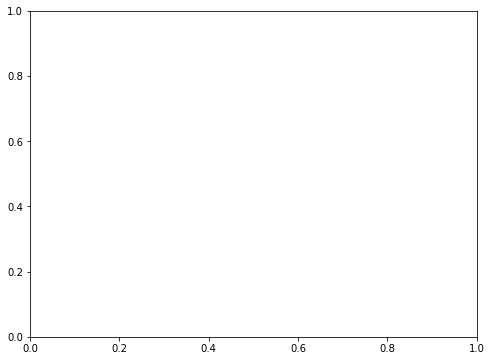

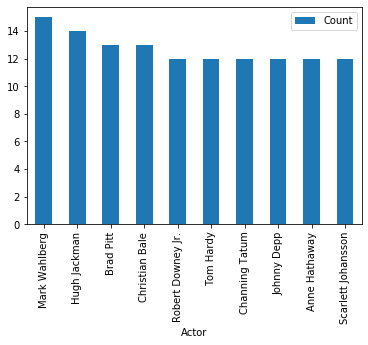

In [32]:
# for each Actor, display all the movies with detail.

import itertools
acting_make = movie['Actors'].unique().tolist()
l=[]
for actor in acting_make:
    l.append(actor.split(','))
dir_lis = set(itertools.chain(*l))

for actor in dir_lis:
    df = movie[movie['Actors'].str.contains(actor)]
    print('---------------------------------'+actor+'---------------------------------------')
    print(df.head())

# count the movies and visualize the top 10 actor's movies in plot

acting_make = []
top_make = []
for actor in dir_lis:
    length = movie[movie['Actors'].str.contains(actor)].shape[0]
    acting_make.append(actor)
    top_make.append(length)
actor_dict = {'Actor':acting_make, 'Count':top_make}

actor_df = pd.DataFrame.from_dict(actor_dict)
fig, ax = plt.subplots(figsize =(8, 6))
actor_df.sort_values('Count', ascending=False).head(10).plot.bar(x='Actor',y='Count')
fig.show()

In [33]:
# filter the movies with specific actor's name

df=movie[movie['Actors'].str.contains('Ryan Gosling')]
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
95,96,The Nice Guys,"Action,Comedy,Crime","In 1970s Los Angeles, a mismatched pair of pri...",Shane Black,"Russell Crowe, Ryan Gosling, Angourie Rice, Ma...",2016,116,7.4,175067,36.25,70.0
135,136,The Place Beyond the Pines,"Crime,Drama,Thriller",A motorcycle stunt rider turns to robbing bank...,Derek Cianfrance,"Ryan Gosling, Bradley Cooper, Eva Mendes,Craig...",2012,140,7.3,200090,21.38,68.0
142,143,The Big Short,"Biography,Comedy,Drama",Four denizens in the world of high-finance pre...,Adam McKay,"Christian Bale, Steve Carell, Ryan Gosling, Br...",2015,130,7.8,246360,70.24,81.0
157,158,"Crazy, Stupid, Love.","Comedy,Drama,Romance",A middle-aged husband's life changes dramatica...,Glenn Ficarra,"Steve Carell, Ryan Gosling, Julianne Moore, Em...",2011,118,7.4,396714,84.24,68.0


Actors
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani                    1
Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy    1
Martin Freeman, Ian McKellen, Richard Armitage,Andy Serkis             1
Name: Rating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


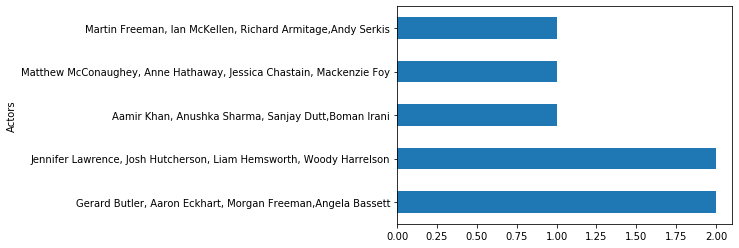

In [34]:
# List of top 5 Actor per year who has highest rating from the year 2010 - 2017

acting = movie[(movie['Year'] > 2010) & (movie['Year'] < 2017)]
earning = acting.groupby('Actors')['Rating'].count().sort_values(ascending=False).head(5)
print(earning)

# plot horizontal barcahrt of upper output

print(earning.plot.barh(rot=0))

Rank                  552
Title                 552
Genre                 552
Description           552
Director              552
Actors                552
Year                  552
Runtime (Minutes)     552
Rating                552
Votes                 552
Revenue (Millions)    552
Metascore             552
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


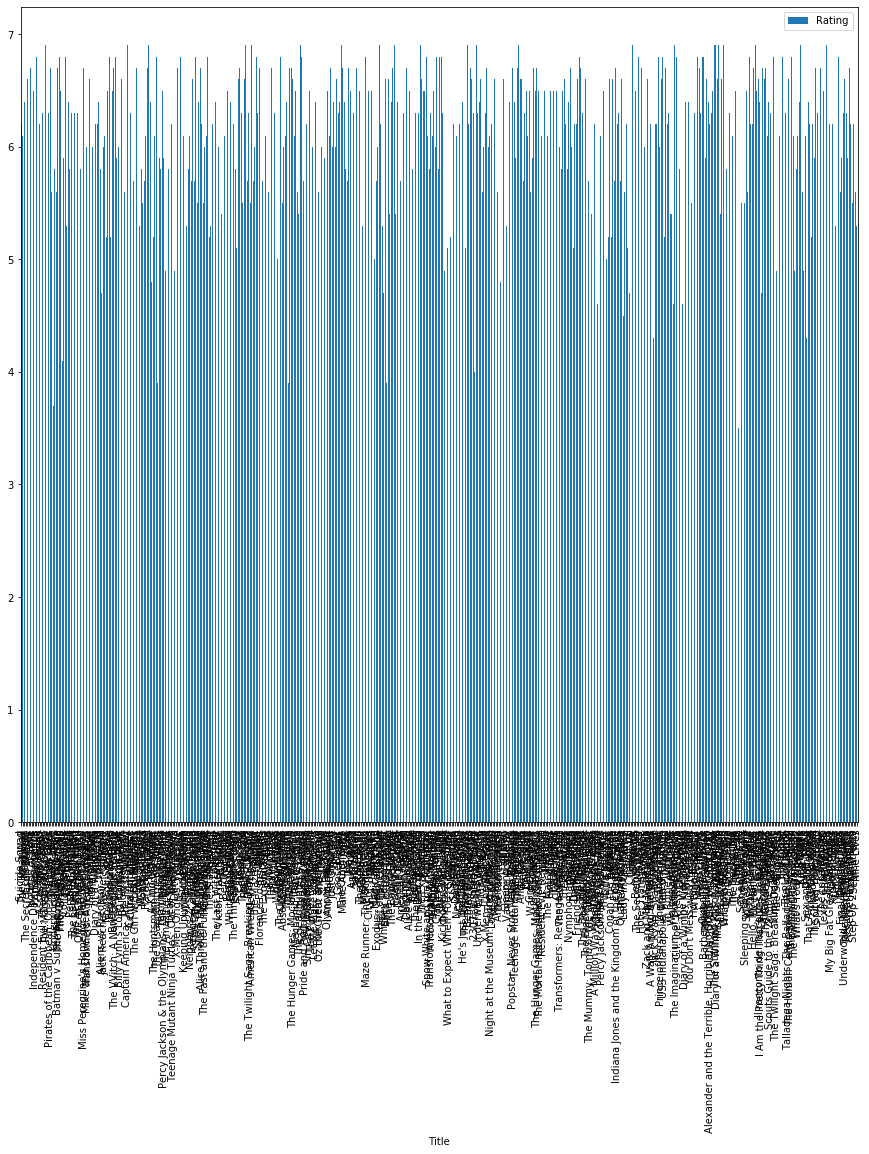

In [35]:
# show count all movies which has rating more 3.0 and less than 7.0

movie_count = movie[(movie['Rating'] > 3.0) & (movie['Rating'] < 7.0)]
print(movie_count.count())

# plot vertical barchart of upper output, movies w.r.t rating

print(movie_count.plot.bar(x='Title', y='Rating', rot=90, figsize=(15,15)))


AxesSubplot(0.125,0.125;0.775x0.755)


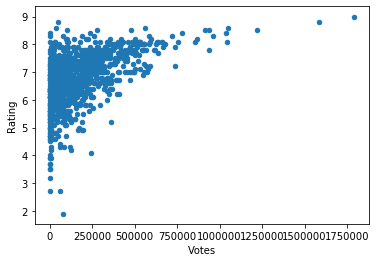

In [36]:
#  plot scatter between voting and rating 

print(movie.plot(kind='scatter', x='Votes', y='Rating'))


In [37]:
# print top 10 movies which has higher revenue

# plot horizontal barchart of upper output


AxesSubplot(0.125,0.125;0.775x0.755)


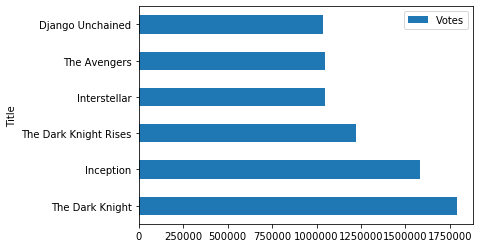

In [38]:
# top 10 movies which has highest number of voting greater than 1000000

voting = movie[movie['Votes'] > 1000000]
vote_big = voting.sort_values('Votes', ascending=False).head(10)

# plot horizontal barchart of upper output 

print(vote_big.plot.barh(x='Title', y='Votes', rot=0))



In [39]:
# print top 10 directors, which has generated highest "average ravenue".
a = movie.sort_values('Revenue (Millions)',ascending=False).head(10)
print(a.Director)

# plot horizontal bar chart of revenue w.r.t director
b = pd.DataFrame(a,columns=['Director','Revenue_Millions'])
b.plot(x ='Director', y='Revenue (Millions)', kind = 'barh')
plt.show()

50           J.J. Abrams
87         James Cameron
85       Colin Trevorrow
76           Joss Whedon
54     Christopher Nolan
12        Gareth Edwards
119       Andrew Stanton
94           Joss Whedon
124    Christopher Nolan
578     Francis Lawrence
Name: Director, dtype: object


KeyError: 'Revenue (Millions)'